<span style="font-size:2em;">**Students Performance in Exams**</span>

This dataset contains marks of students in math, reading and writing. The main objective of analyzing this data is to understand which factors influence students performance the most. The variables considered are race, the level of education of the parents, diet and the way in which the students prepared for the exams.

This dataset is composed of the following variables:

- **gender:** Male or female.
- **race/ethnicity:** Grouped from A to E.
- **parental level of education:** Grouped from high school to master's degree.
- **lunch:** Type of lunch (standard or reduced).
- **test preparation course:** If a student did the test preparation course before the exams.
- **math score**
- **reading score**
- **writing score**

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

# Descriptive Statistics

Load the dataset, look at the descriptive statistics and check for missing values is the first thing to do.

In [2]:
students_df = pd.read_csv('../data/raw/StudentsPerformance.csv')

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


The lowest average score was math, which was also the only subject that had 0 as minimum.

There were students with maximum scores in the three subjects.

In [6]:
students_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

# Data Processing

First, we are renaming the columns and their values for plotting purposes.

In [7]:
students_df.rename(columns={'gender': 'Gender', 
                   'race/ethnicity': 'Race', 
                   'parental level of education': 'Parental Level of Education',
                   'lunch': 'Lunch',
                   'test preparation course': 'Test Preparation Course',
                   'math score': 'Math Score',
                   'reading score': 'Reading Score',
                   'writing score': 'Writing Score',}, inplace=True)

In [8]:
students_df["Gender"].replace({"male": "Male", "female": "Female"}, inplace=True)
students_df["Race"].replace({"group A": "Group A", "group B": "Group B",
                                  "group C": "Group C","group D": "Group D",
                                  "group E": "Group E"}, inplace=True)
students_df["Parental Level of Education"].replace({"some college": "Some College", 
                                                    "associate's degree": "Associate's Degree",
                                                    "high school": "High School",
                                                    "some high school": "Some High School",
                                                    "bachelor's degree": "Bachelor's Degree",
                                                    "master's degree": "Master's Degree"}, inplace=True)
students_df["Lunch"].replace({"standard": "Standard", "free/reduced": "Free/Reduced"}, inplace=True)
students_df["Test Preparation Course"].replace({"none": "None", "completed": "Completed"}, inplace=True)

Let's create a USA GPA column that will be useful throughout the analysis.

In [9]:
grades_mapper = {'A': 90, 'B': 80, 'C': 70, 'D': 60}

def calc_usa_gpa(score):
    for grade, threshold in grades_mapper.items():
        if score >= threshold:
            return grade
    return 'F'
    
students_df["Math GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Math Score"]), axis=1)
students_df["Reading GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Reading Score"]), axis=1)
students_df["Writing GPA"] = students_df.apply(lambda x : calc_usa_gpa(x["Writing Score"]), axis=1)

Next, we are going to create a column with the number of exams the students passed.

In [10]:
def get_exams_passed(student):
    passed = 0
    for grade in ["Math GPA", "Reading GPA", "Writing GPA"]:
        if student[grade] < 'F':
            passed += 1
    return passed

students_df["Exams Passed"] = students_df.apply(lambda x : get_exams_passed(x), axis=1)

We must verify that the GPA and the number of exams passed were calculated correctly.

In [11]:
students_df[["Math Score", "Math GPA", "Reading Score", "Reading GPA", "Writing Score", "Writing GPA", "Exams Passed"]].head()

,Math Score,Math GPA,Reading Score,Reading GPA,Writing Score,Writing GPA,Exams Passed
0,72,C,72,C,74,C,3
1,69,D,90,A,88,B,3
2,90,A,95,A,93,A,3
3,47,F,57,F,44,F,0
4,76,C,78,C,75,C,3


Everything checks out!

# Data Visualization

We will go through the rest of this notebook creating different plots to answer some questions.

**What is the proportion of students by gender?**

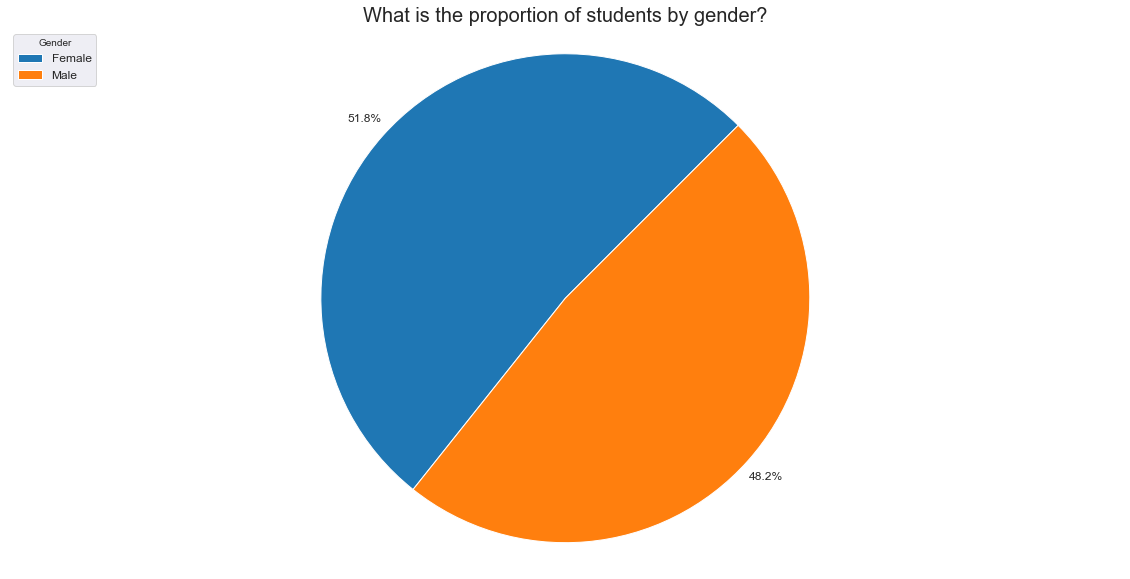

In [14]:
gender_counts = students_df["Gender"].value_counts()
ax = gender_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('What is the proportion of students by gender?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["Female", "Male"], loc="upper left", title="Gender", fontsize=12);

The percentage of females is slightly higher.

**How many students are there by race?**

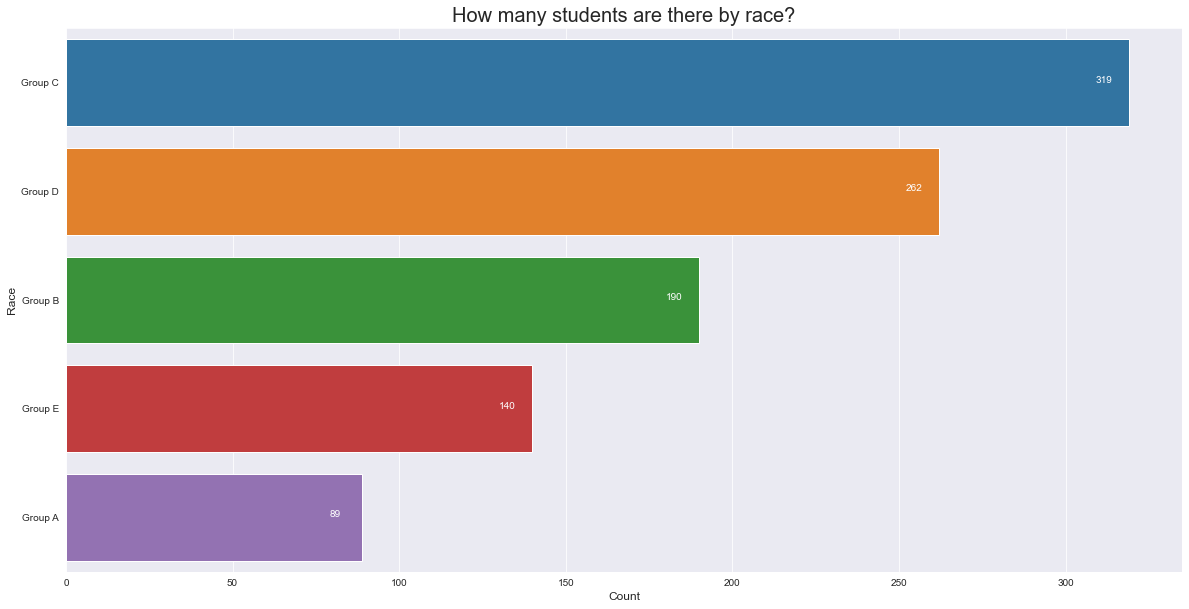

In [15]:
race_value_counts = students_df['Race'].value_counts()
plt.figure(figsize=(20,10))
ax = sns.barplot(x=race_value_counts.values, y=race_value_counts.index, orient='h')
ax.set_title("How many students are there by race?", size=20)
ax.set_xlabel(xlabel="Count", size=12)
ax.set_ylabel(ylabel="Race", size=12)

# Annotate value labels to each group
for index, value in enumerate(race_value_counts): 
    plt.annotate(value, xy=(value-10, index), color='white') 

Groups C and D are by far the most prevalent.

**What is the parents' level of education?**

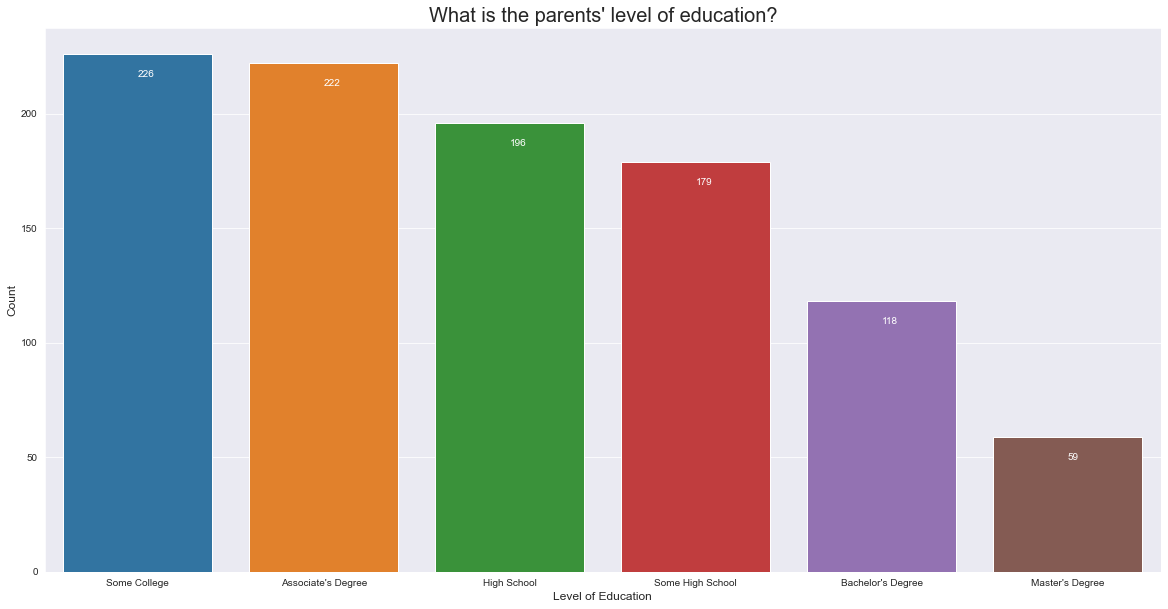

In [17]:
level_education_value_counts = students_df['Parental Level of Education'].value_counts()
plt.figure(figsize=(20,10))
ax = sns.barplot(x=level_education_value_counts.index, y=level_education_value_counts.values)
ax.set_title("What is the parents' level of education?", size=20)
ax.set_xlabel(xlabel="Level of Education", size=12)
ax.set_ylabel(ylabel="Count", size=12)

# Annotate value labels to each level
for index, value in enumerate(level_education_value_counts): 
    plt.annotate(value, xy=(index, value-10), color='white') 

Most of the parents went to college or have an associate's degree.

**How are race and parental level of education grouped?**

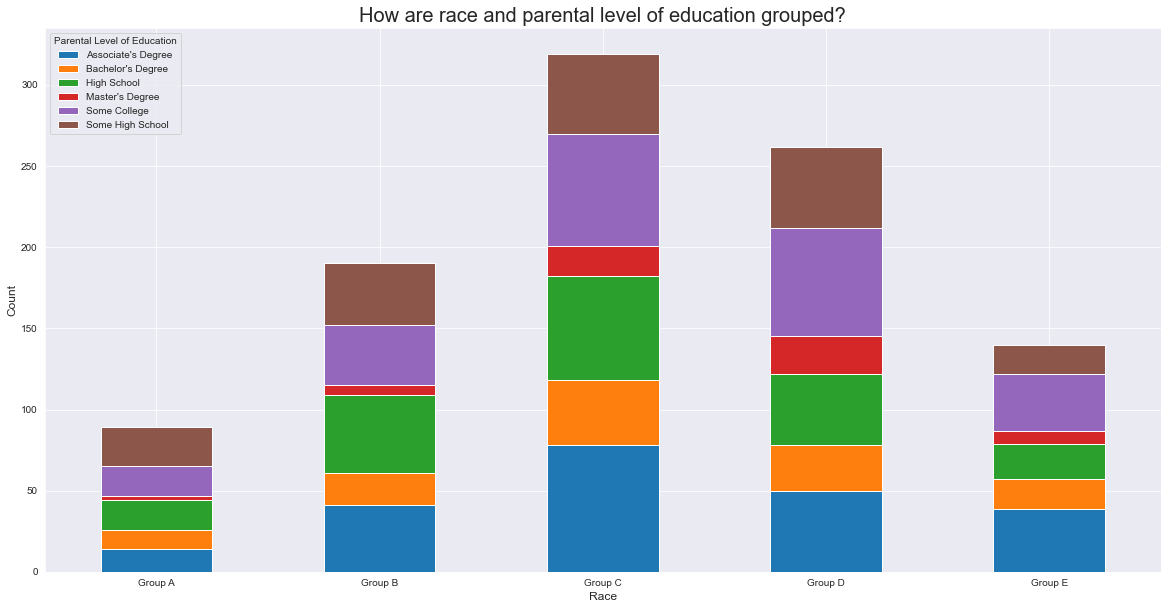

In [23]:
ax = pd.crosstab(students_df["Race"], [students_df["Parental Level of Education"]]).plot.bar(stacked=True, figsize=(20,10))
ax.set_title("How are race and parental level of education grouped?", size=20)
ax.set_xlabel(xlabel="Race", size=12)
ax.set_ylabel(ylabel="Count", size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc="upper left", title="Parental Level of Education");

"Some College" and "High School" (or some) are the most common levels of education across all groups, followed by Associate's degree. 

Groups C and D have more parents with a Master's degree.

**Which lunch type is preferred?**

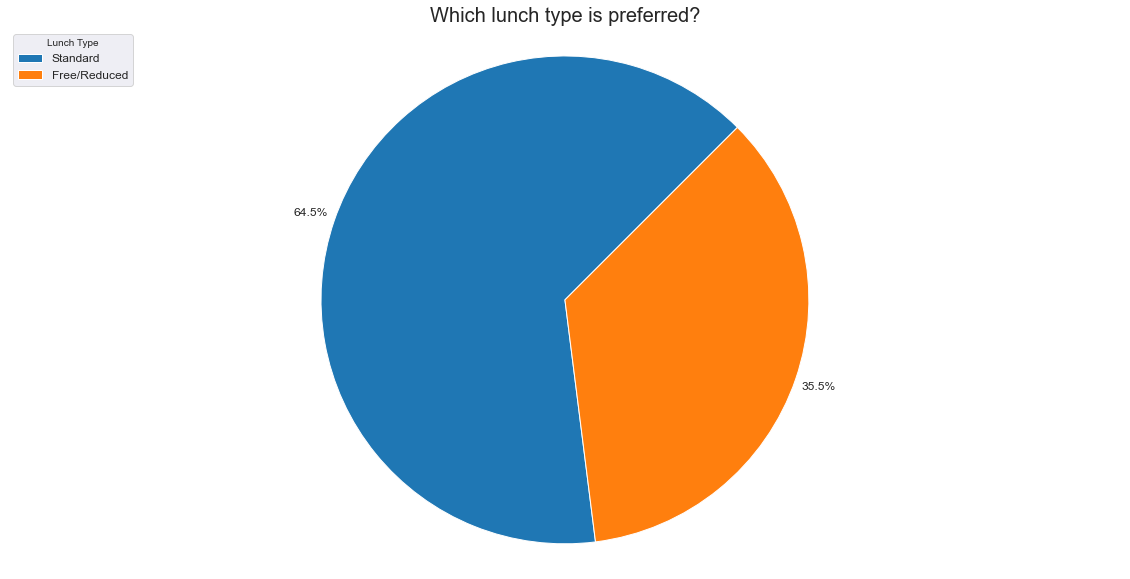

In [29]:
lunch_counts = students_df["Lunch"].value_counts()
ax = lunch_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Which lunch type is preferred?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["Standard", "Free/Reduced"], title="Lunch Type", fontsize=12);

The standard lunch is the most popular.

**Did the students take the test preparation course?**

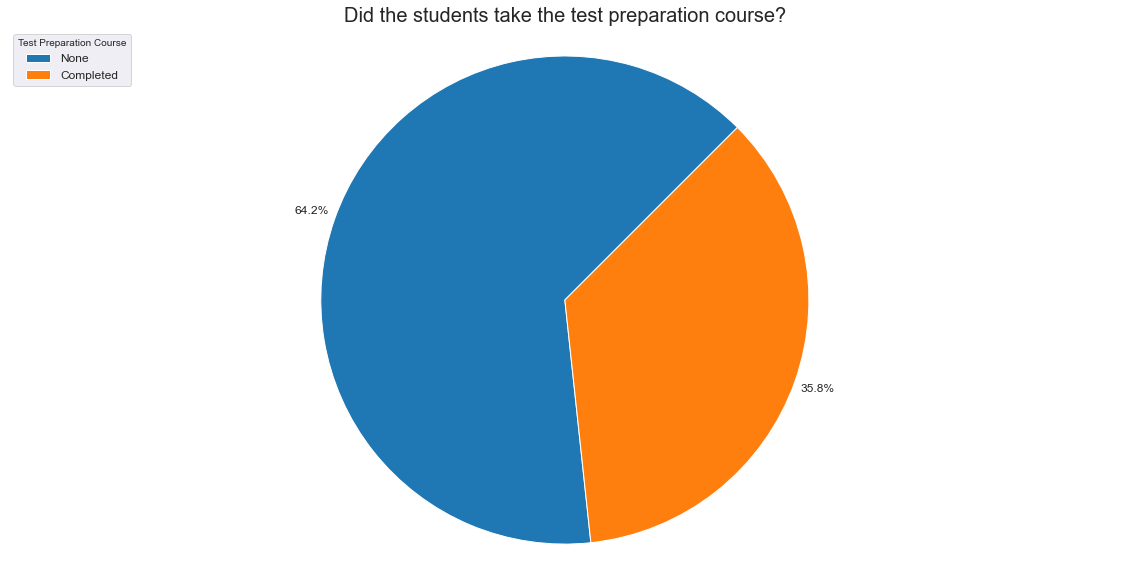

In [31]:
test_preparation_counts = students_df["Test Preparation Course"].value_counts()
ax = test_preparation_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Did the students take the test preparation course?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["None", "Completed"], title="Test Preparation Course", fontsize=12);

Most students did not take the test preparation course.

**How are scores distributed?**

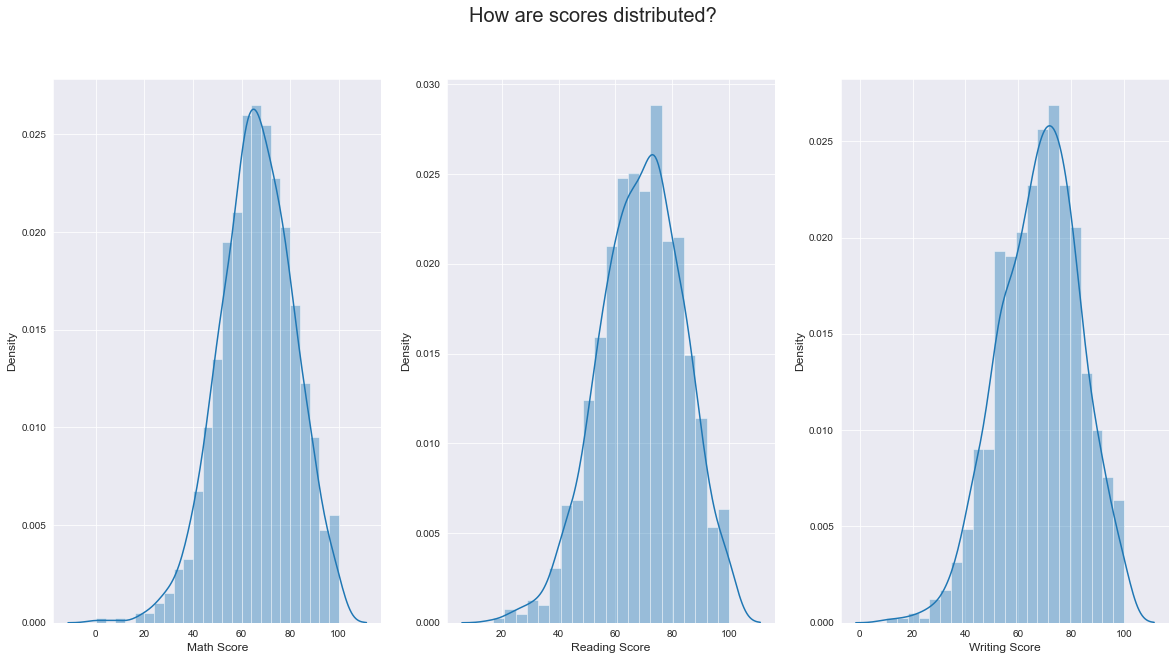

In [33]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in students_df[["Math Score", "Reading Score", "Writing Score"]].items():
    sns.distplot(value, ax=ax[index])
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Density", size=12)
    index += 1
    
fig.suptitle("How are scores distributed?", fontsize=20);

The scores are slightly left skewed.

**How are grades distributed?**

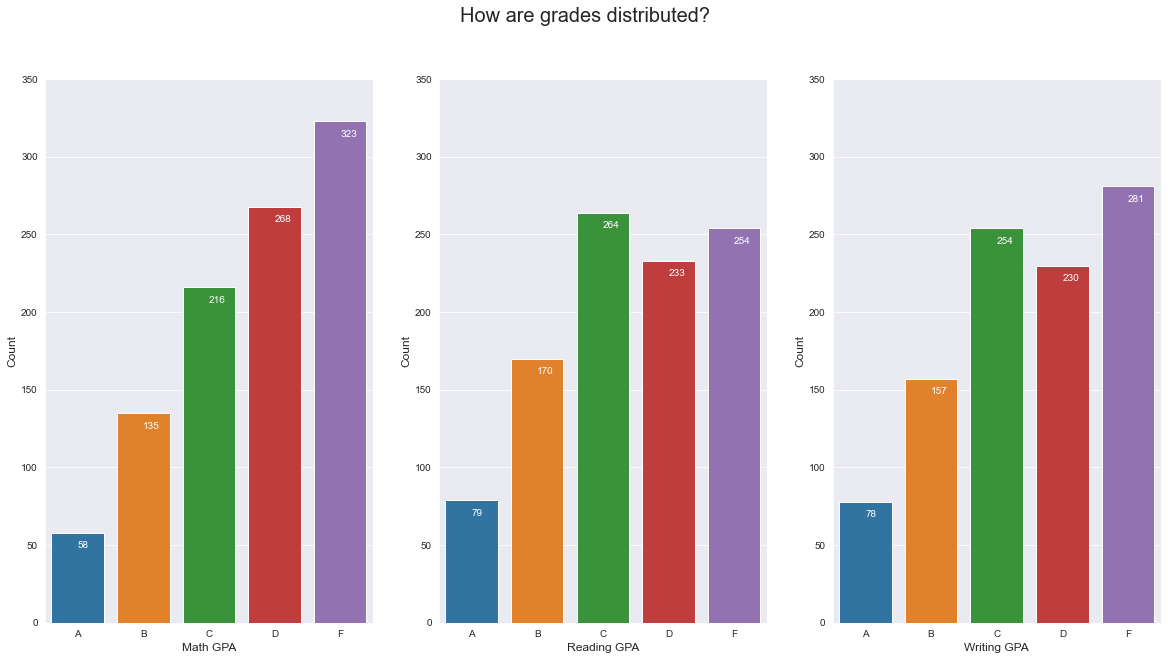

In [34]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in ["Math GPA", "Reading GPA", "Writing GPA"]:
    sns.countplot(students_df[col], ax=ax[index], order=['A', 'B', 'C', 'D', 'F'])
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Count", size=12)
    ax[index].set_ylim([0, 350])
    # Annotate value labels to each grade
    for i, value in enumerate(students_df[col].value_counts().sort_index()): 
        ax[index].annotate(value, xy=(i, value-10), color='white') 
    index += 1
    
fig.suptitle("How are grades distributed?", fontsize=20);

Math had the worse grades, while reading had the best. 

323 students failed at math, while 254 failed at reading and 281 failed at writing.

**How many students passed in all exams?**

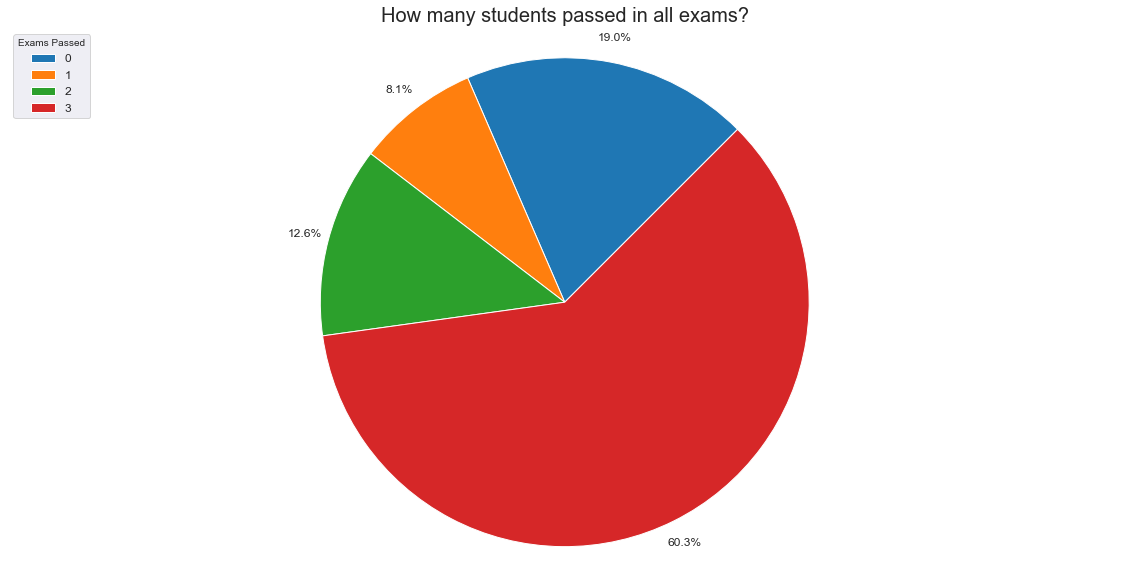

In [36]:
exams_passed_counts = students_df["Exams Passed"].value_counts().sort_index()
ax = exams_passed_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('How many students passed in all exams?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=[0, 1, 2, 3], title="Exams Passed", fontsize=12);

Most students passed all three exams.

There were more students failing all three exams than failing one or two.

**Which gender is better at Math?**

Before plotting sunburst charts to see which gender got better grades in which subjects, we're writing some auxiliary code.

In [37]:
def plot_sunburst_chart(subject):
    plt.figure(figsize=(20, 10))
    gpa_counts = pd.crosstab(students_df[f"{subject} GPA"], students_df["Gender"])
    totals_labels = gpa_counts.index
    totals = gpa_counts.values.sum(axis=1)
    by_gender = gpa_counts.values.flatten()
    by_gender_labels = len(gpa_counts) * ["F", "M"]

    by_gender_colors = len(gpa_counts) * ['#ffb3e6', '#c2c2f0']
    explode = (0.3,0.3,0.3,0.3,0.3) 

    plt.pie(totals, 
            labels=totals_labels,
            autopct='%1.1f%%', 
            pctdistance=1.1,
            labeldistance=0.8,
            startangle=180,
            textprops={'fontsize': 14},
            radius=12)
    plt.pie(by_gender,
            labels=by_gender_labels,
            colors=by_gender_colors,
            autopct='%1.1f%%', 
            pctdistance=1.15,
            labeldistance=0.8,
            startangle=180,
            textprops={'fontsize': 14, 'color': 'white'},
            radius=7)

    centre_circle = plt.Circle((0,0), 5, color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title(f'Which gender is better at {subject}?', fontsize=20)

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

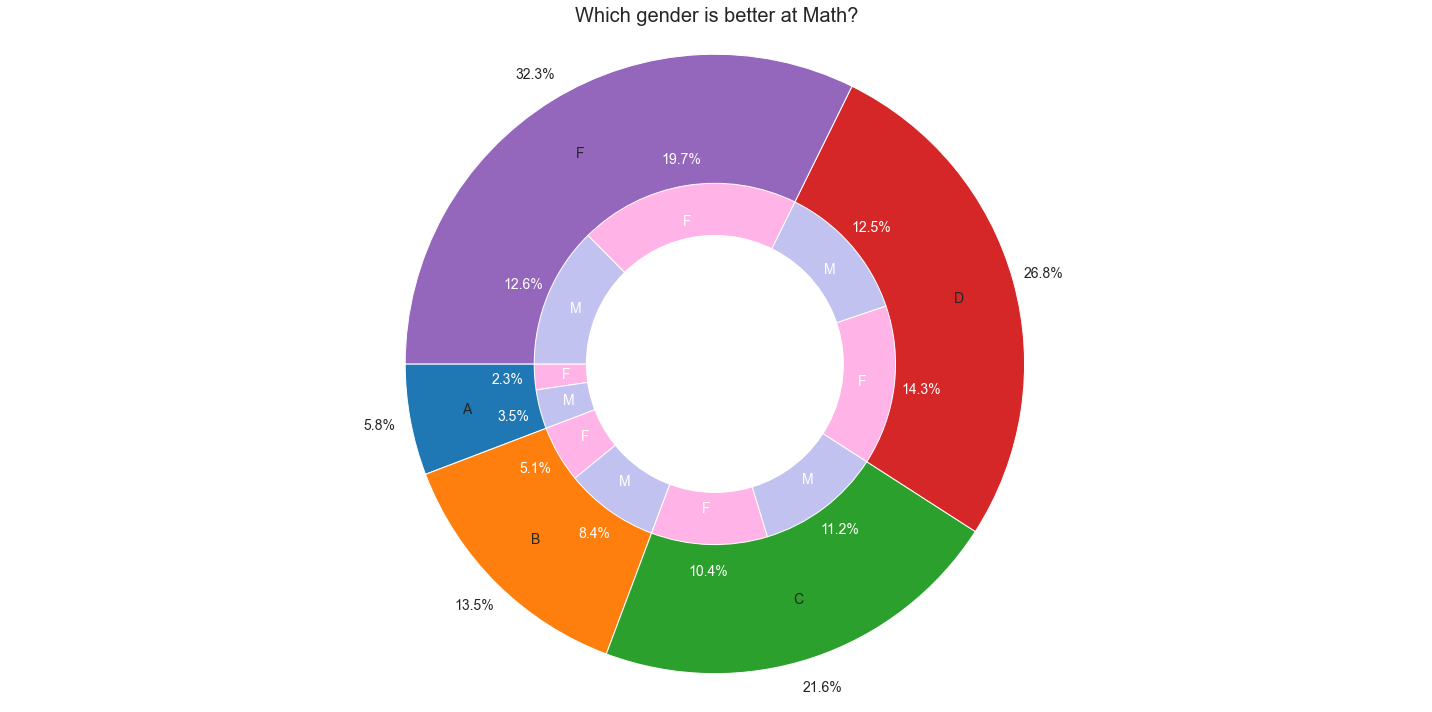

In [38]:
plot_sunburst_chart("Math")

More males got As, Bs, and Cs, so they did better in math.

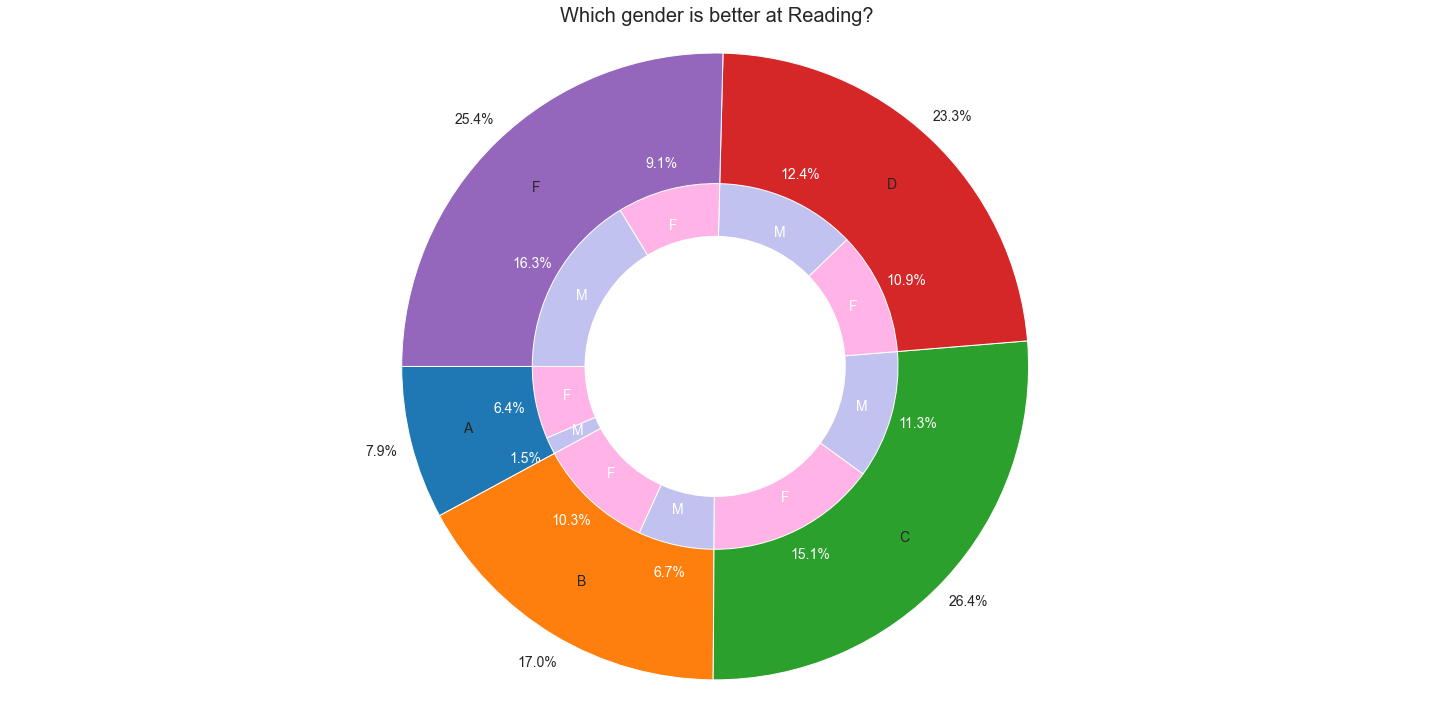

In [39]:
plot_sunburst_chart("Reading")

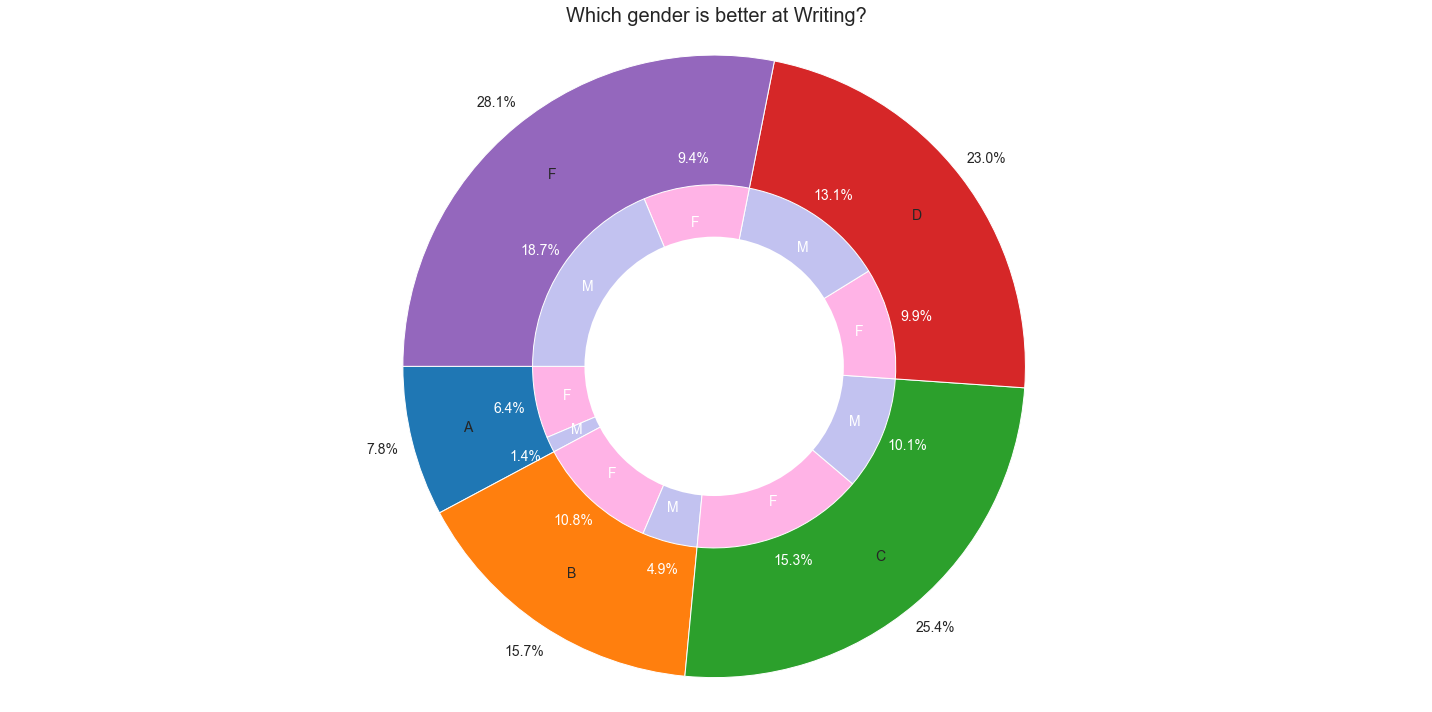

In [40]:
plot_sunburst_chart("Writing")

The plots for reading and writing are similar, females did better.

**How are the different scores related?**

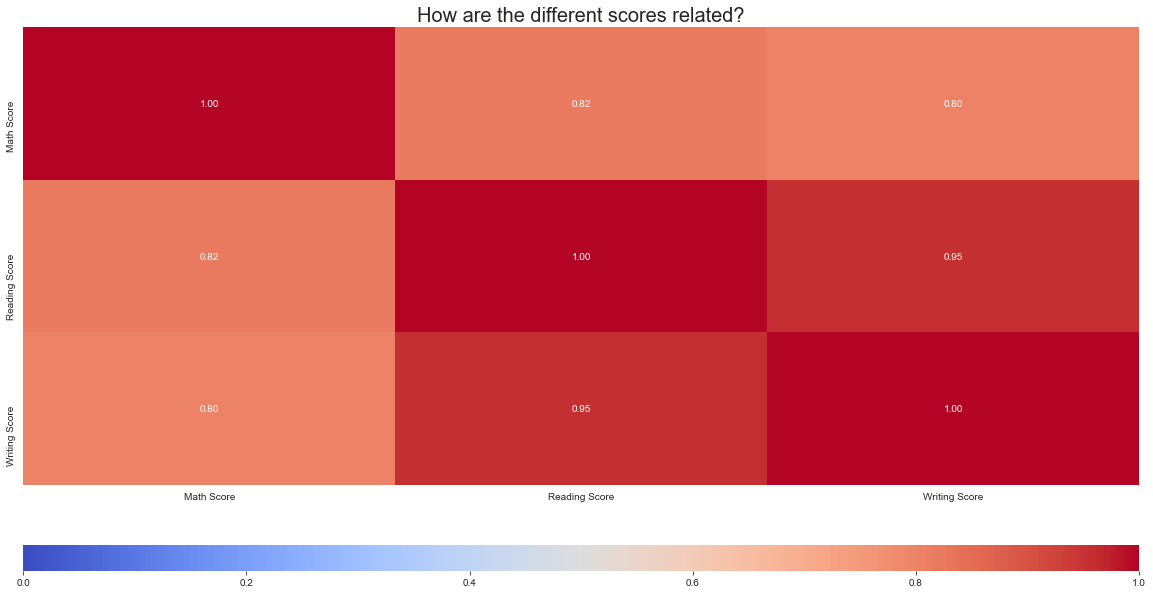

In [41]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(students_df[["Math Score", "Reading Score", "Writing Score"]].corr(),
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('How are the different scores related?', size = 20);

Reading score and writing score are highly correlated so a student who reads also writes well.

Math scores have lower correlations with other subjects, so we can't be so sure that if a student is good at math he is good at other subjects or vice versa.

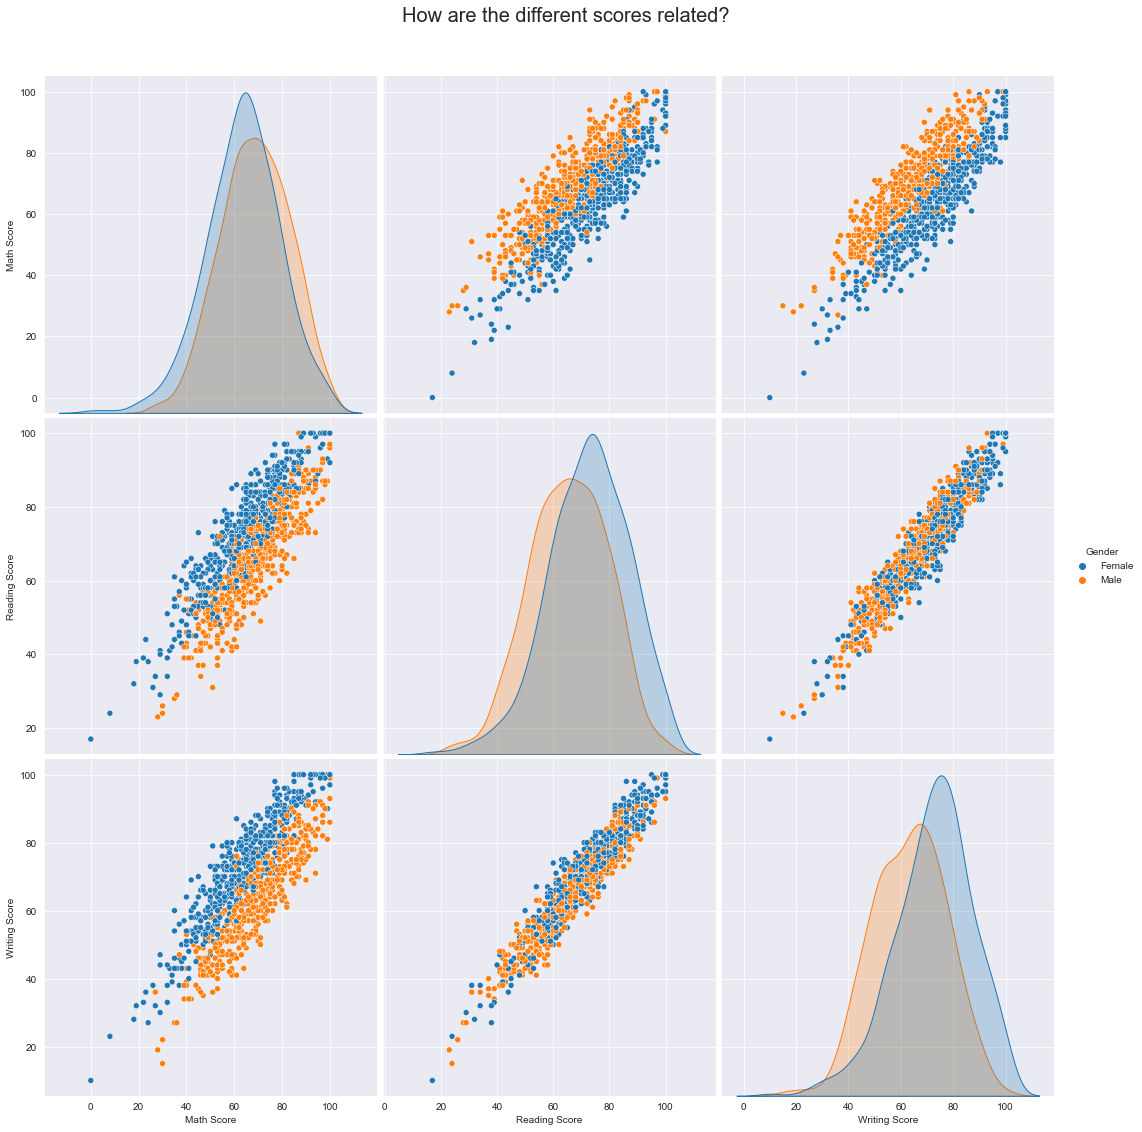

In [42]:
g = sns.pairplot(students_df[["Math Score", "Reading Score", "Writing Score", "Gender"]], hue="Gender", height=5);
g.fig.suptitle("How are the different scores related?", size=20, y=1.05);

It appears that the scores of the different subjects increase linearly with each other.

Most students have between 40 and 90 (about 90%) in the three subjects.

**How do gender and race influence scores?**

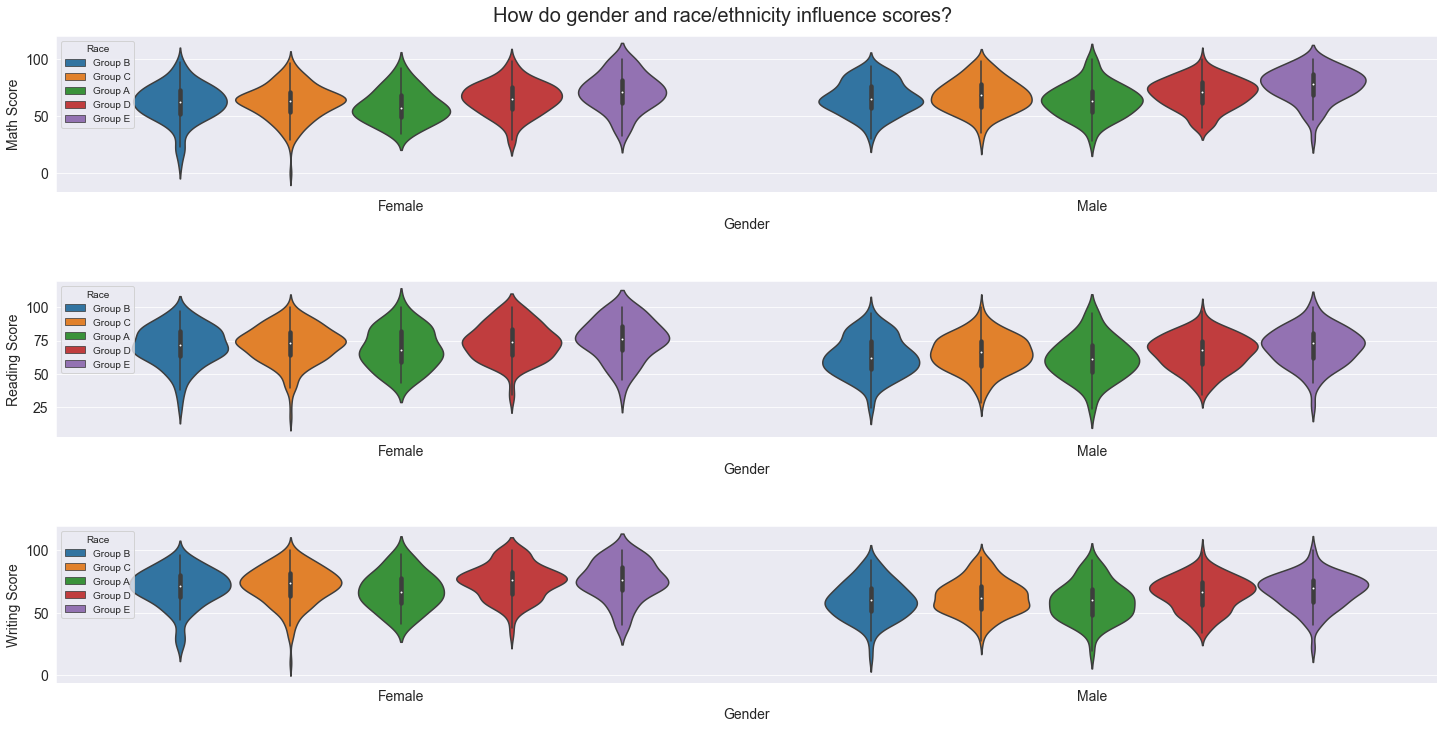

In [46]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.violinplot(x="Gender", y=col, hue="Race", data=students_df, ax=ax[index])
    ax[index].set_xlabel("Gender", fontsize=14)
    ax[index].set_ylabel(col.title(), fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(loc="upper left", title="Race")
    
fig.suptitle("How do gender and race/ethnicity influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

For both genders, group E had the highest scores, while group A did the worst.

**How do gender and parental level of education influence scores?**

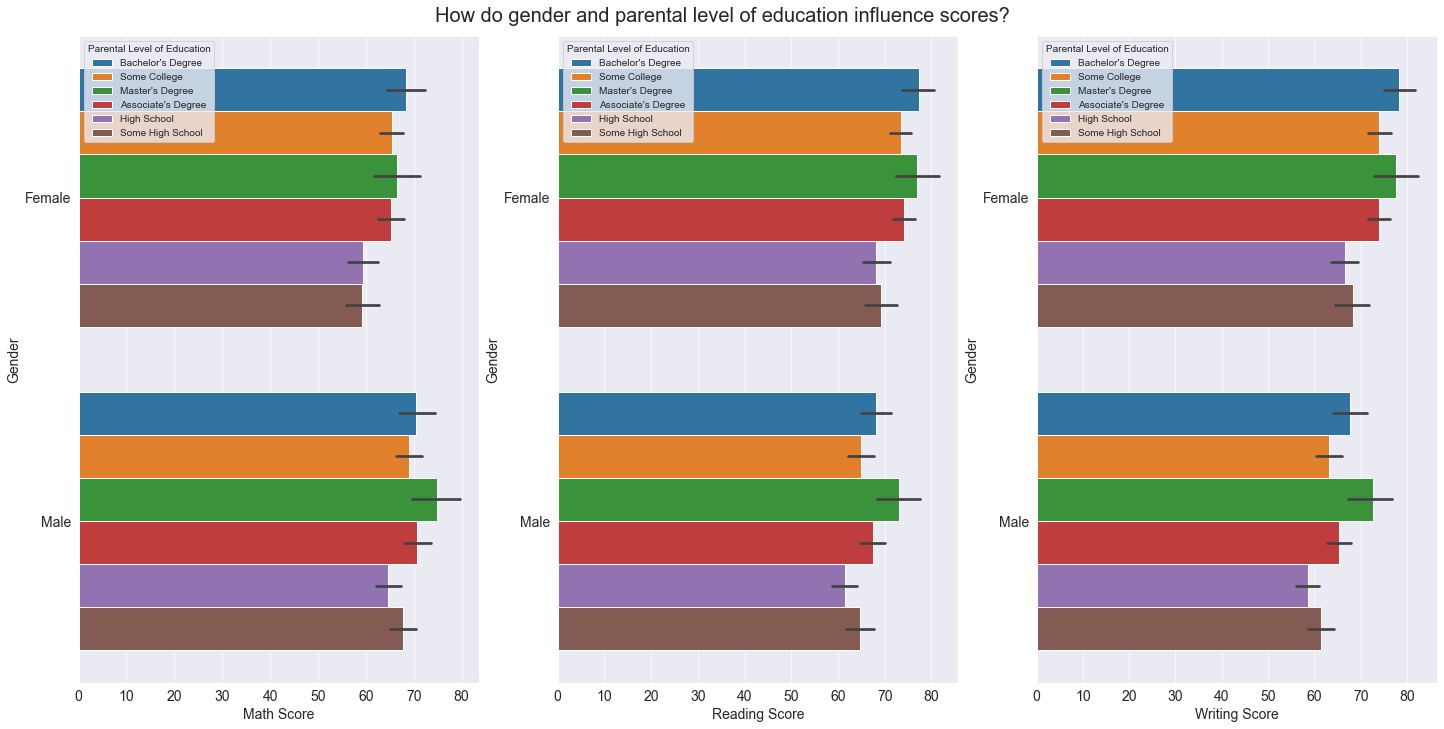

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.barplot(x=col, y="Gender", hue="Parental Level of Education", data=students_df, ax=ax[index])
    ax[index].set_xlabel(col, fontsize = 14)
    ax[index].set_ylabel("Gender", fontsize=14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)

fig.suptitle("How do gender and parental level of education influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Students whose parents are better educated (Bachelor's and Master's) tend to have better grades in all subjects. It seems that parents with a master's degree have more influence on male students' grades.

If the parental level of education is "High School" and "Some High School" the students tend to have lower scores.

**How do gender and lunch type influence scores?**

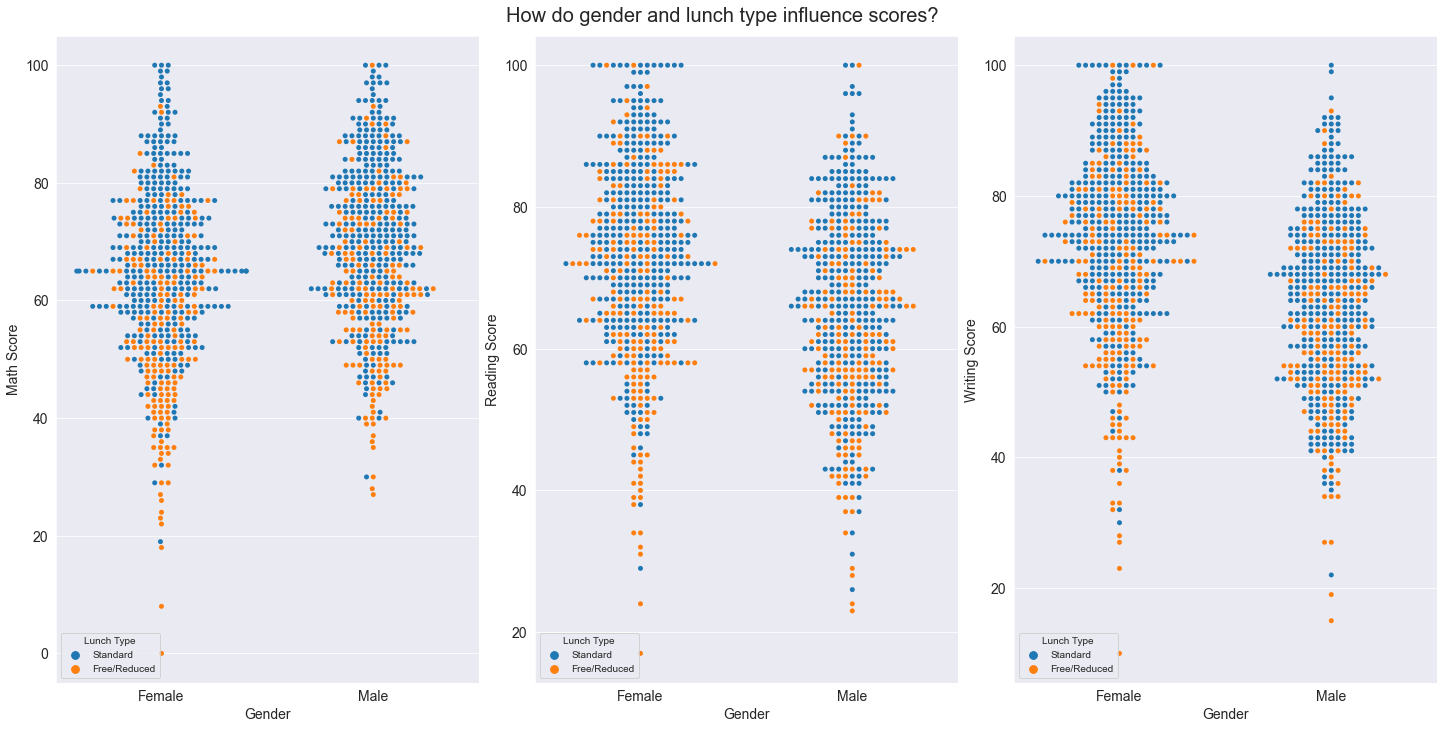

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.swarmplot(x="Gender", y=col, hue="Lunch", data=students_df, ax=ax[index])
    ax[index].set_xlabel("Gender", fontsize = 14)
    ax[index].set_ylabel(col, fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(loc="lower left", title="Lunch Type")
    
fig.suptitle("How do gender and lunch type influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

As expected, well-nourished students learn better.

**How do gender and test preparation course influence scores?**

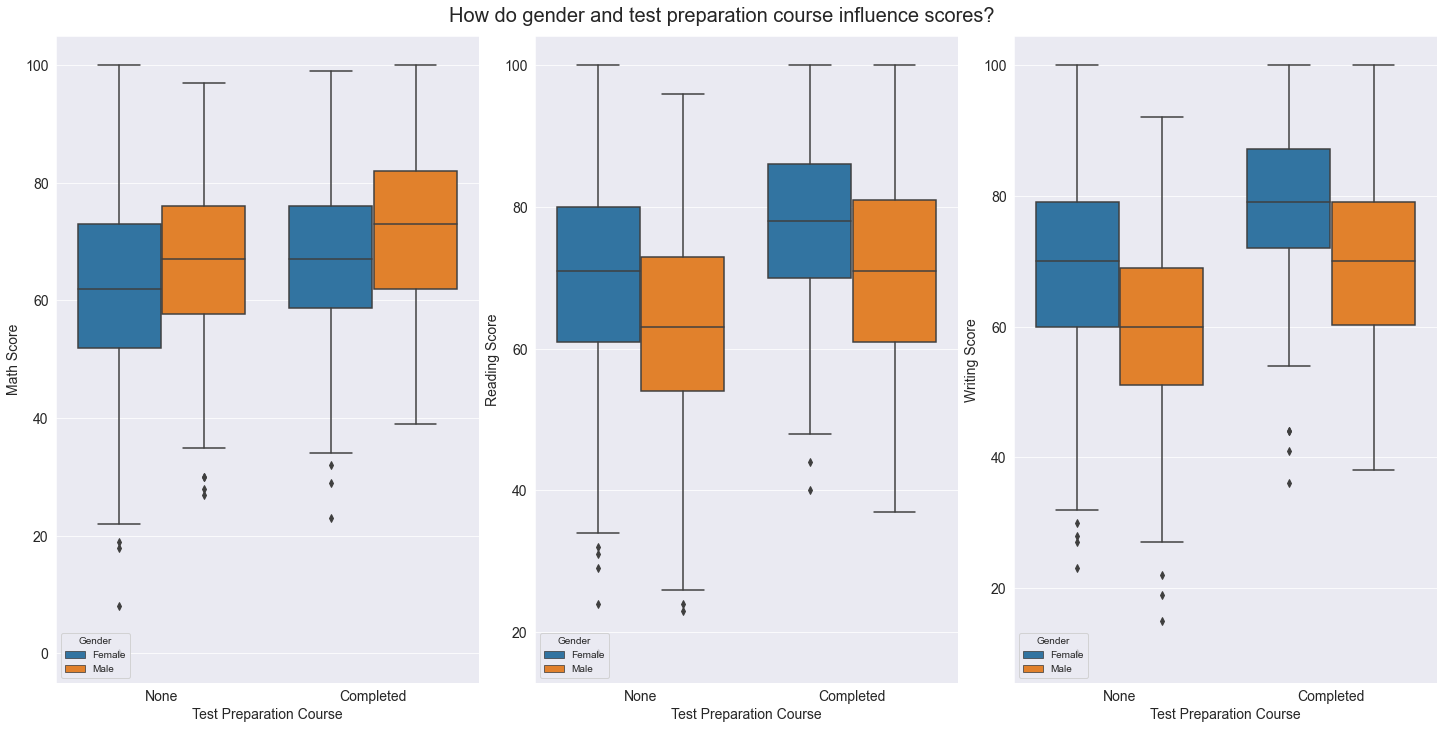

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["Math Score", "Reading Score", "Writing Score"]):
    sns.boxplot(x=students_df['Test Preparation Course'],y=students_df[col], hue=students_df['Gender'], ax=ax[index])
    ax[index].set_xlabel("Test Preparation Course", fontsize = 14)
    ax[index].set_ylabel(col, fontsize = 14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)
    ax[index].legend(loc="lower left", title="Gender")
    
fig.suptitle("How do gender and test preparation course influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

It's clear that preparation pays off. However, there are some outliers. 
Some students performed well even when they did not complete test preparation. The opposite is also true.

# References

1. KraLMachine. (2019). Seaborn Tutorial For Beginners. Available at: https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners
2. Datta, N. (2020). Students performance in Exams- EDA in depth. Available at: https://www.kaggle.com/nitindatta/students-performance-in-exams-eda-in-depth
3. An, S. (2020). Basic of Statistical Viz : Plotly & Seaborn. Available at: https://www.kaggle.com/subinium/basic-of-statistical-viz-plotly-seaborn
4. Huang, W. (2021). Python Pie/Donut/Sunburst Charts. Available at: https://waynestalk.com/en/python-pie-donut-sunburst-charts-en/
5. Prasad, B. (2021). Student Academic Performance Analysis. Available at: https://www.kaggle.com/bhartiprasad17/student-academic-performance-analysis
6. Kamr, A. (2021). EDA By Seaborn & Feature Engineering For Beginners. Available at: https://www.kaggle.com/abdokamr/eda-by-seaborn-feature-engineering-for-beginners

**If you like this notebook, please give it an upvote as it keeps me motivated. Plus, I am open to feedback.**